##  MTech Graded Assessment 
## Subject : ML-2 
## Marks: 40 
## Time : 4 Hours 

### DATASET: 

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable is RainTomorrow. This means: Did it rain the next day? Yes or No.

### ATTRIBUTE INFORMATION:  

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


1. 'Date'= The date of observation

2. 'Location'=The common name of the location of the weather station

3. 'MinTemp'= The minimum temperature in degrees celsius

4. 'MaxTemp'= The maximum temperature in degrees celsius

5. 'Rainfall' = The amount of rainfall recorded for the day in mm

6. 'Evaporation'= The so-called Class A pan evaporation (mm) in the 24 hours to 9am
       
7. 'Sunshine'= The number of hours of bright sunshine in the day.

8. 'WindGustDir'= The direction of the strongest wind gust in the 24 hours to midnight

9. 'WindGustSpeed'= The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. 'WindDir9am'= Direction of the wind at 9am

11. 'WindDir3pm' = Direction of the wind at 3pm

12. 'WindSpeed9am'= Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. 'WindSpeed3pm'=  Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. 'Humidity9am'= Humidity (percent) at 9am

15. 'Humidity3pm'= Humidity (percent) at 3pm

16. 'Pressure9am'= Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. 'Pressure3pm'= Atmospheric pressure (hpa) reduced to mean sea level at 3pm

18. 'Cloud9am'= Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are

19. 'Cloud3pm'= Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. 'Temp9am'= Temperature (degrees C) at 9am
       
21. 'Temp3pm'=  Temperature (degrees C) at 3pm

22. 'RainToday'=  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

23. 'RISK_MM'= The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

24. 'RainTomorrow'= The target variable. Did it rain tomorrow?

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [ ]:
# Kindly change the below cells from markdown to code and execute it 

import pandas as pd
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [7]:
df=pd.read_csv('weather.csv')

In [8]:
# feature use to create target variable
df=df.drop("RISK_MM",1)

### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [9]:
df.shape

(1040, 23)

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1035.000000,1035.000000,1029.00000,582.000000,533.000000,969.000000,1032.000000,1023.000000,1031.000000,1016.000000,929.000000,932.000000,613.000000,597.000000,1034.000000,1022.000000
mean,12.008019,23.055942,2.18552,5.183505,7.606379,40.026832,13.768411,18.414467,69.535403,51.698819,1017.277718,1014.931438,4.592170,4.447236,16.794584,21.477495
std,6.176816,6.809834,7.50278,3.426213,3.756107,13.703520,8.350102,8.446346,18.204141,20.227374,7.353785,7.243600,2.897498,2.745218,6.101344,6.665932
min,-4.100000,-0.800000,0.00000,0.400000,0.000000,9.000000,0.000000,0.000000,6.000000,3.000000,986.300000,989.300000,0.000000,0.000000,-2.800000,-2.900000
25%,7.500000,17.900000,0.00000,2.650000,5.000000,31.000000,7.000000,13.000000,58.000000,37.000000,1012.700000,1010.000000,1.000000,2.000000,12.300000,16.400000
50%,11.800000,22.500000,0.00000,4.400000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,6.000000,5.000000,16.600000,21.050000
75%,16.350000,27.700000,0.80000,7.000000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,20.900000,25.900000
max,28.600000,43.900000,121.40000,25.600000,13.800000,113.000000,52.000000,54.000000,100.000000,100.000000,1040.200000,1035.700000,8.000000,8.000000,39.100000,42.400000


In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,...,64.0,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,...,56.0,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,No


In [13]:
df.describe(include=["O"])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,1040,1040,969,981,1014,1029,1040
unique,890,49,16,16,16,2,2
top,23-07-2016,SalmonGums,W,N,SE,No,No
freq,4,33,80,85,84,788,829


In [14]:
cat_df=df.select_dtypes(include="object")
cat_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,S,SSW,SW,Yes,Yes
1,06-01-2011,PerthAirport,WSW,SSW,WSW,Yes,No
2,29-06-2014,Penrith,WNW,WNW,WNW,No,No
3,16-12-2008,Cairns,SSE,SSE,SE,No,No
4,21-04-2015,SalmonGums,N,NE,W,No,No


In [15]:
for feature in cat_df.columns:
    print(cat_df[feature].value_counts()/len(cat_df))

23-07-2016    0.003846
02-10-2013    0.002885
16-06-2017    0.002885
31-08-2010    0.002885
14-10-2013    0.002885
                ...   
07-01-2009    0.000962
22-11-2016    0.000962
01-05-2010    0.000962
08-03-2009    0.000962
10-06-2013    0.000962
Name: Date, Length: 890, dtype: float64
SalmonGums          0.031731
Launceston          0.029808
Sydney              0.029808
NorahHead           0.027885
Darwin              0.027885
Walpole             0.026923
Perth               0.025000
MountGambier        0.025000
Hobart              0.025000
Witchcliffe         0.024038
BadgerysCreek       0.024038
PerthAirport        0.024038
Brisbane            0.023077
Richmond            0.023077
MelbourneAirport    0.023077
Wollongong          0.023077
Woomera             0.022115
WaggaWagga          0.022115
Dartmoor            0.022115
Tuggeranong         0.021154
Albury              0.021154
Newcastle           0.021154
NorfolkIsland       0.021154
Sale                0.021154
Adelaide   

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [16]:
df.isnull().sum()/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.004808
MaxTemp          0.004808
Rainfall         0.010577
Evaporation      0.440385
Sunshine         0.487500
WindGustDir      0.068269
WindGustSpeed    0.068269
WindDir9am       0.056731
WindDir3pm       0.025000
WindSpeed9am     0.007692
WindSpeed3pm     0.016346
Humidity9am      0.008654
Humidity3pm      0.023077
Pressure9am      0.106731
Pressure3pm      0.103846
Cloud9am         0.410577
Cloud3pm         0.425962
Temp9am          0.005769
Temp3pm          0.017308
RainToday        0.010577
RainTomorrow     0.000000
dtype: float64

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,...,64.0,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,...,56.0,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,No


### fill the missing value

In [18]:
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]=df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Rainfall"]=df["Rainfall"].fillna(df["Rainfall"].mode()[0])
df["WindGustDir"]=df["WindGustDir"].fillna(df["WindGustDir"].mode()[0])
df["WindGustSpeed"]=df["WindGustSpeed"].fillna(df["WindGustSpeed"].mode()[0])
df["WindDir9am"]=df["WindDir9am"].fillna(df["WindDir9am"].mode()[0])
df["WindDir3pm"]=df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0])
df["WindSpeed9am"]=df["WindSpeed9am"].fillna(df["WindSpeed9am"].mode()[0])
df["WindSpeed3pm"]=df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mode()[0])
df["Humidity9am"]=df["Humidity9am"].fillna(df["Humidity9am"].median())
df["Humidity3pm"]=df["Humidity3pm"].fillna(df["Humidity3pm"].median())
df["Temp9am"]=df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]=df["Temp3pm"].fillna(df["Temp3pm"].mean())
df["RainToday"]=df["RainToday"].fillna(df["RainToday"].mode()[0])

In [19]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation      458
Sunshine         507
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am      111
Pressure3pm      108
Cloud9am         427
Cloud3pm         443
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

### features with high missing value, we have use knn imputation

In [20]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=5)
df[["Evaporation","Sunshine","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm"]]=imp.fit_transform(df[["Evaporation","Sunshine","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm"]])

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,6.200000,7.000000,S,63.0,SSW,...,69.0,92.0,1018.500000,1017.600000,1.00000,8.000000,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.400000,11.800000,WSW,39.0,SSW,...,60.0,36.0,1004.600000,1003.600000,7.00000,1.000000,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,5.183505,7.606379,WNW,56.0,WNW,...,41.0,41.0,1017.277718,1014.931438,4.59217,4.447236,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.000000,7.000000,SSE,41.0,SSE,...,64.0,59.0,1009.800000,1007.400000,6.00000,5.000000,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,5.183505,7.606379,N,28.0,NE,...,56.0,29.0,1017.277718,1014.931438,4.59217,4.447236,14.0,21.1,No,No


In [22]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

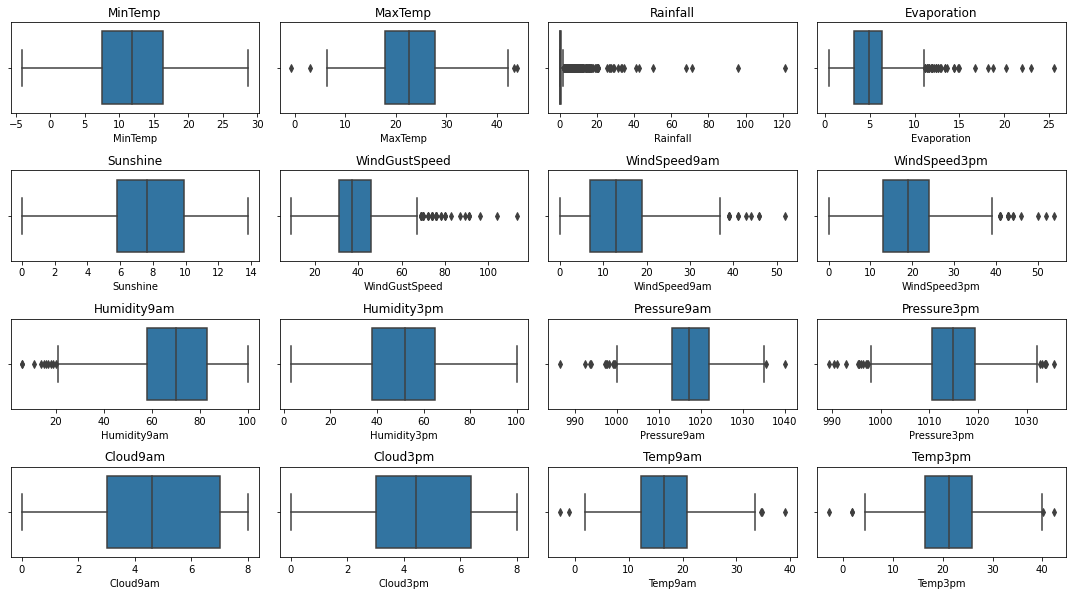

In [23]:
num_df=df.select_dtypes(include=np.number)
plt.figure(figsize=(15,10))
k=1
for i in num_df.columns:
    ax=plt.subplot(5,4,k)
    plt.title(i)
    sns.boxplot(num_df[i])
    k=k+1
plt.tight_layout()

There are some outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

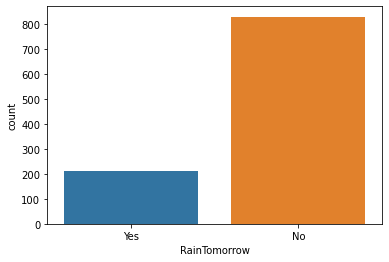

In [24]:
sns.countplot(df["RainTomorrow"])

Data is imbalance, so we can use smote technique

### 4.	Summarize relationships among variables (5 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,6.200000,7.000000,S,63.0,SSW,...,69.0,92.0,1018.500000,1017.600000,1.00000,8.000000,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.400000,11.800000,WSW,39.0,SSW,...,60.0,36.0,1004.600000,1003.600000,7.00000,1.000000,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,5.183505,7.606379,WNW,56.0,WNW,...,41.0,41.0,1017.277718,1014.931438,4.59217,4.447236,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.000000,7.000000,SSE,41.0,SSE,...,64.0,59.0,1009.800000,1007.400000,6.00000,5.000000,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,5.183505,7.606379,N,28.0,NE,...,56.0,29.0,1017.277718,1014.931438,4.59217,4.447236,14.0,21.1,No,No


Convert Date feature using datatime

In [26]:
from datetime import datetime 
df["Date"]=pd.to_datetime(df["Date"])

In [27]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

In [28]:
df=df.drop("Date",1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Wollongong,16.0,20.4,8.2,6.200000,7.000000,S,63.0,SSW,SW,...,1017.600000,1.00000,8.000000,17.4,15.6,Yes,Yes,2012,7,3
1,PerthAirport,18.5,25.9,16.0,5.400000,11.800000,WSW,39.0,SSW,WSW,...,1003.600000,7.00000,1.000000,22.2,25.1,Yes,No,2011,6,1
2,Penrith,8.7,16.5,0.0,5.183505,7.606379,WNW,56.0,WNW,WNW,...,1014.931438,4.59217,4.447236,13.1,15.1,No,No,2014,6,29
3,Cairns,25.5,33.9,0.2,5.000000,7.000000,SSE,41.0,SSE,SE,...,1007.400000,6.00000,5.000000,30.8,31.5,No,No,2008,12,16
4,SalmonGums,3.8,23.0,0.0,5.183505,7.606379,N,28.0,NE,W,...,1014.931438,4.59217,4.447236,14.0,21.1,No,No,2015,4,21


In [29]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year               int64
month              int64
day                int64
dtype: object

In [30]:
df["year"]=df["year"].astype("object")
df["month"]=df["month"].astype("object")
df["day"]=df["day"].astype("object")
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year              object
month             object
day               object
dtype: object

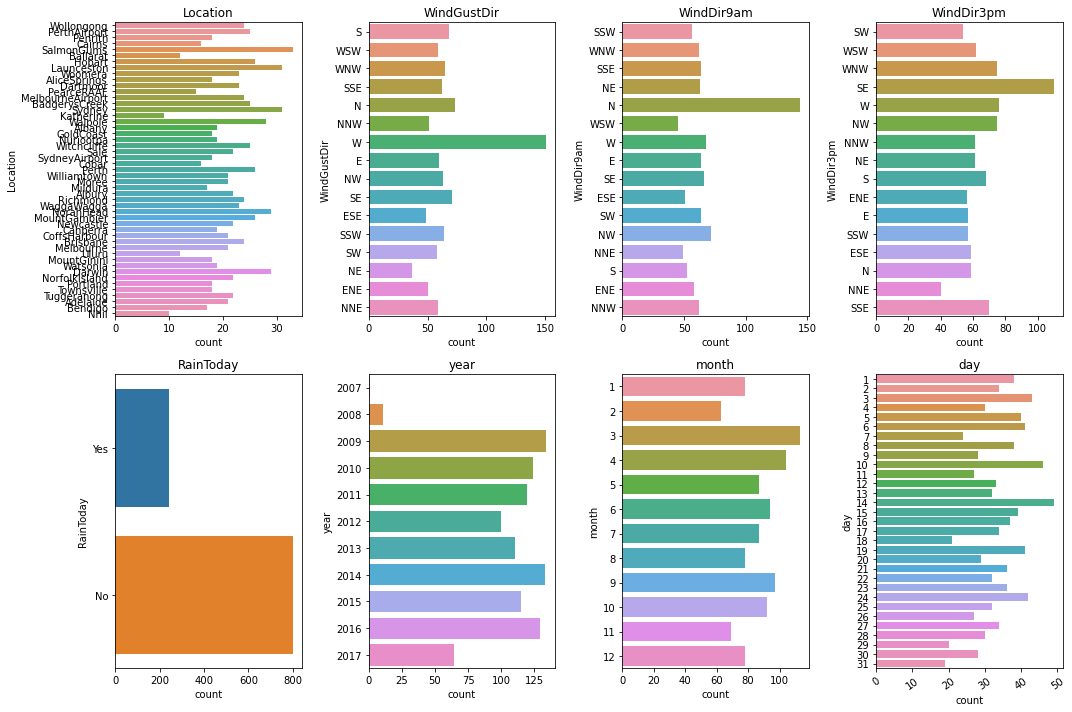

In [31]:
cat_df=df.select_dtypes(exclude=np.number).drop("RainTomorrow",1)
plt.figure(figsize=(15,10))
k=1
for i in cat_df.columns:
    ax=plt.subplot(2,4,k)
    plt.title(i)
    sns.countplot(y=cat_df[i],orient="h")
    k=k+1
plt.xticks(rotation=35)
plt.tight_layout()

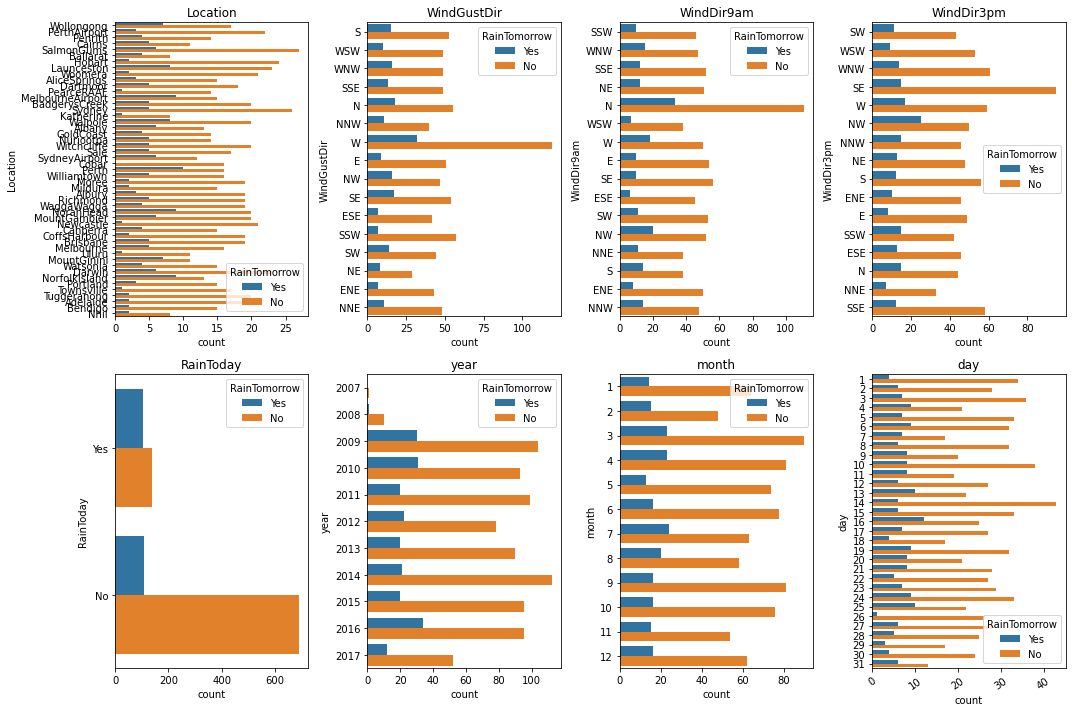

In [32]:
#cat_df=df.select_dtypes(exclude=np.number).drop("RainTomorrow",1)
plt.figure(figsize=(15,10))
k=1
for i in cat_df.columns:
    ax=plt.subplot(2,4,k)
    plt.title(i)
    sns.countplot(y=cat_df[i],hue=df["RainTomorrow"],orient="h")
    k=k+1
plt.xticks(rotation=35)
plt.tight_layout()

In [33]:
cat_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,year,month,day
0,Wollongong,S,SSW,SW,Yes,2012,7,3
1,PerthAirport,WSW,SSW,WSW,Yes,2011,6,1
2,Penrith,WNW,WNW,WNW,No,2014,6,29
3,Cairns,SSE,SSE,SE,No,2008,12,16
4,SalmonGums,N,NE,W,No,2015,4,21


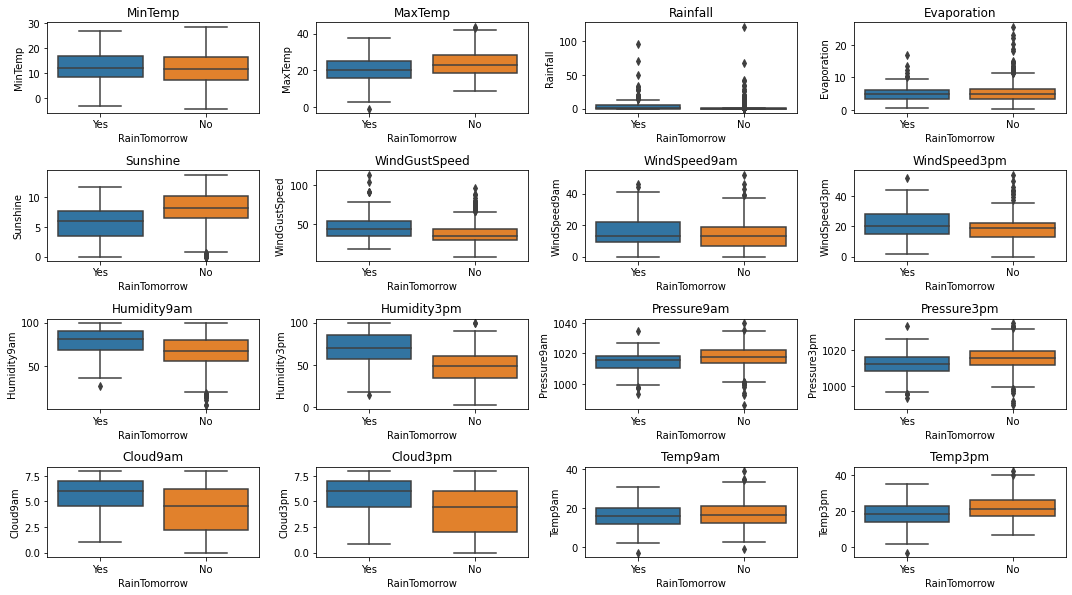

In [34]:
num_df=df.select_dtypes(include=np.number)
plt.figure(figsize=(15,10))
k=1
for i in num_df.columns:
    ax=plt.subplot(5,4,k)
    plt.title(i)
    sns.boxplot(y=num_df[i],x=df["RainTomorrow"])
    k=k+1
plt.tight_layout()

<AxesSubplot:>

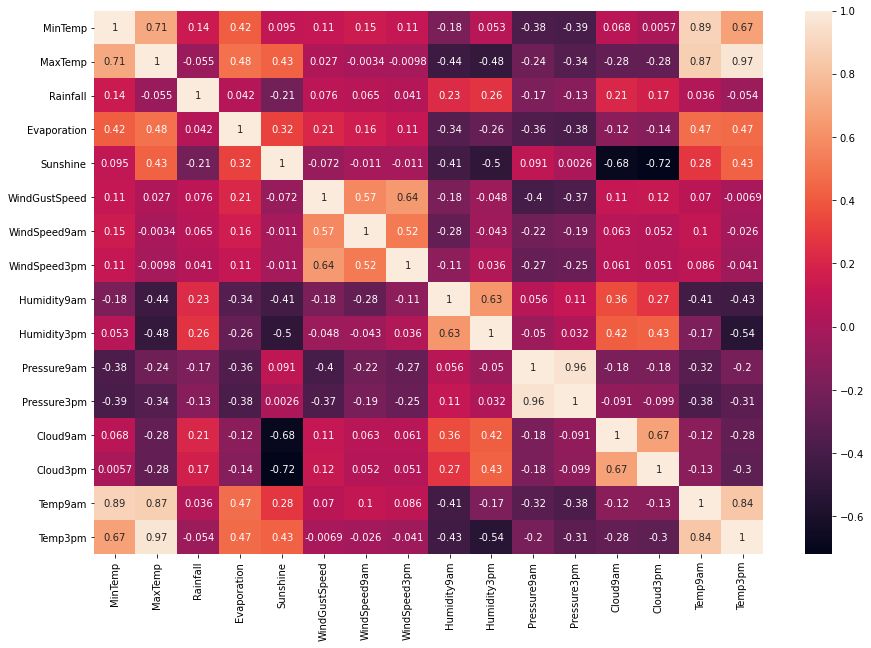

In [35]:
plt.figure(figsize=(15,10))
cor=num_df.corr()
sns.heatmap(cor,annot=True)

drop the feature with high correlation among independent features

In [36]:
df=df.drop(["Temp3pm","Temp9am","Pressure3pm"],1)

In [37]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Wollongong,16.0,20.4,8.2,6.200000,7.000000,S,63.0,SSW,SW,...,69.0,92.0,1018.500000,1.00000,8.000000,Yes,Yes,2012,7,3
1,PerthAirport,18.5,25.9,16.0,5.400000,11.800000,WSW,39.0,SSW,WSW,...,60.0,36.0,1004.600000,7.00000,1.000000,Yes,No,2011,6,1
2,Penrith,8.7,16.5,0.0,5.183505,7.606379,WNW,56.0,WNW,WNW,...,41.0,41.0,1017.277718,4.59217,4.447236,No,No,2014,6,29
3,Cairns,25.5,33.9,0.2,5.000000,7.000000,SSE,41.0,SSE,SE,...,64.0,59.0,1009.800000,6.00000,5.000000,No,No,2008,12,16
4,SalmonGums,3.8,23.0,0.0,5.183505,7.606379,N,28.0,NE,W,...,56.0,29.0,1017.277718,4.59217,4.447236,No,No,2015,4,21


In [38]:
df["RainTomorrow"]=df["RainTomorrow"].map({"Yes":1,"No":0})
df_final=pd.get_dummies(df,drop_first=True)
df_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,16.0,20.4,8.2,6.200000,7.000000,63.0,39.0,20.0,69.0,92.0,...,0,0,0,0,0,0,0,0,0,0
1,18.5,25.9,16.0,5.400000,11.800000,39.0,20.0,22.0,60.0,36.0,...,0,0,0,0,0,0,0,0,0,0
2,8.7,16.5,0.0,5.183505,7.606379,56.0,19.0,22.0,41.0,41.0,...,0,0,0,0,0,0,0,1,0,0
3,25.5,33.9,0.2,5.000000,7.000000,41.0,11.0,19.0,64.0,59.0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,23.0,0.0,5.183505,7.606379,28.0,13.0,7.0,56.0,29.0,...,0,0,0,0,0,0,0,0,0,0


### 5.	Split dataset into train and test (70:30) (1 mark)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
X=df_final.drop("RainTomorrow",1)
Y=df_final["RainTomorrow"]
mx=MinMaxScaler()
X_scale=pd.DataFrame(mx.fit_transform(X),columns=X.columns)
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1)
x_train.shape

(728, 158)

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (5 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model

e.	Which other key model output parameters do you want to look at? 


In [41]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

LogisticRegression

In [42]:
lr=LogisticRegression()
score=cross_val_score(lr,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.4438347846278881
std= 0.10044311860052749


KNN

In [43]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.2773160173160173
std= 0.11838969537547735


Naive_bayes

In [44]:
nb=GaussianNB()
score=cross_val_score(nb,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.36668590106101207
std= 0.035865901377107275


DT

In [45]:
dt=DecisionTreeClassifier()
score=cross_val_score(dt,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.4906289724392442
std= 0.07990265240580562


Random_forest

In [46]:
rf=RandomForestClassifier()
score=cross_val_score(rf,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.4534782608695653
std= 0.09142772346878521


AdaBoost

In [47]:
ada=AdaBoostClassifier()
score=cross_val_score(ada,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.5082968761426111
std= 0.10388551505484693


GradientBoost

In [48]:
gb=GradientBoostingClassifier()
score=cross_val_score(gb,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

f1_score= 0.5273927685218006
std= 0.11366875621180302


XGBoost

In [49]:
xgb=XGBClassifier()
score=cross_val_score(xgb,x_train,y_train,cv=10,scoring="f1")
print("f1_score=",score.mean())
print("std=",score.std())

[16:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

XGBoost is having the highest f1_score

##  xgboost as our final model

In [50]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
y_pred_prob=xgb.predict_proba(x_test)

[16:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8173076923076923
f1_score 0.47706422018348627


In [52]:
metrics.confusion_matrix(y_test,y_pred)

array([[229,  23],
       [ 34,  26]], dtype=int64)

In [53]:
pd.DataFrame(xgb.feature_importances_,index=x_train.columns)

,0
MinTemp,0.009207
MaxTemp,0.007468
Rainfall,0.017556
Evaporation,0.010699
Sunshine,0.011160
...,...
day_27,0.000000
day_28,0.000000
day_29,0.000000
day_30,0.015678


### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (15 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


# smote

In [60]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_sample(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

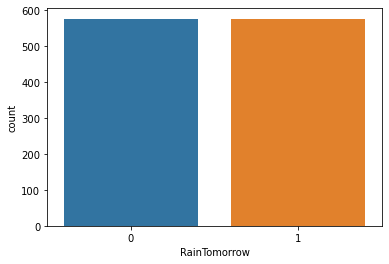

In [61]:
sns.countplot(ytrain)

# hypertune using GridsearchCV

In [62]:
param={"max_depth":[3,4,5,6,8,10],"n_estimators":[40,70,100,200],"learning_rate":[0.001,0.05,0.1]}
xgb=XGBClassifier()
grid_model=GridSearchCV(xgb,param_grid=param,cv=10,verbose=True,n_jobs=-1)
grid_model.fit(xtrain,ytrain)
print("best_param:",grid_model.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_param: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}


In [63]:
xgb=XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
y_pred_prob=xgb.predict_proba(x_test)[:,1]

[17:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8493589743589743
f1_score 0.48351648351648346


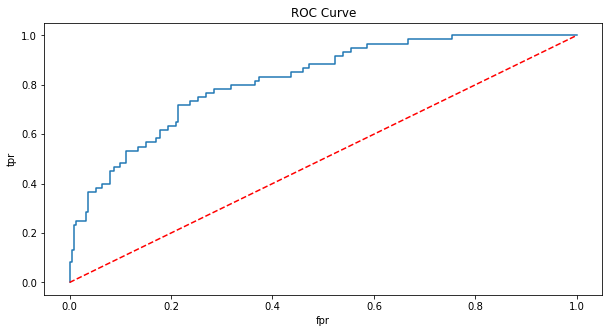

In [65]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot([0,1],[0,1],"r--")
plt.show()

In [66]:
print("AUC_score:",metrics.roc_auc_score(y_test,y_pred_prob))

AUC_score: 0.8185846560846561


### 8.	Summarize as follows (4 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


In [67]:
feature_df=pd.DataFrame(xgb.feature_importances_,index=x_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

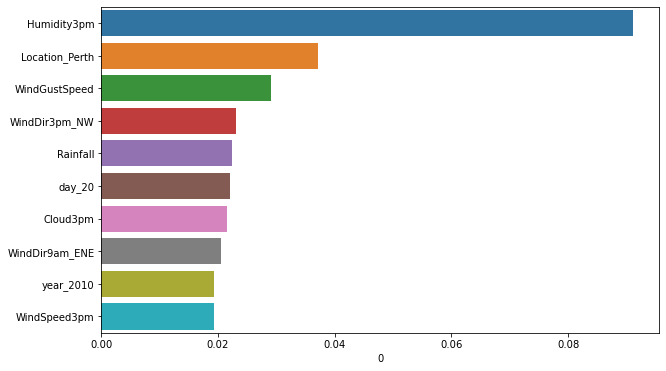

In [68]:
top_fea=feature_df.sort_values(by=0,ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(top_fea[0],top_fea.index)

Humidity3pm has highest impact on the classification model

#### After hyperparameter tuning this are the parameter we have use (learning_rate=0.05,max_depth=4,n_estimators=200) to increase model performance

### after applying smote technique and hypertune the parameter using gridsearchcv , my model performance is able to increase